# Mini-Projet 4 #

### 1.Étude du problème d'otpimisation ###

1. Soit $$f : z \mapsto \frac{1}{2} || z - z_b ||_2^2 + \sum_{(i,j)}|| \nabla z(i,j)||_2^2$$

$f$ est la fonction coût à minimiser par rapport à l'image bruitée $z_b$.

Les variables de décisions sont les coordonnées de la matrice $z$, au nombre de $n \times m$.

Tous les pixels devant en outre être compris entre $0$ et $1$, le vecteur contrainte $c(z)$ contient l'ensemble des coordonnées de $z$ avec $$\forall (i,j) \in \mathbb{R}^{n}\times \mathbb{R}^{m} c_{i,j}= u_{i,j}-1 \text{ et } c_{n+i,m+j}=-u_{n+i,m+j}$$
Il y a donc $2n\times 2m=4nm$ contraintes. 

2. f est convexe et différentiable comme la somme et la composition de fonctions quadratiques et différentiables. 

3. Montrons que $$ \nabla f  = u - u_b - 2\text{div}(\nabla u) = u - u_b - 2\Delta u$$

$\red{\text{À  COMPLÉTER}}$

Text(0.5, 1.0, 'Image Bruitée')

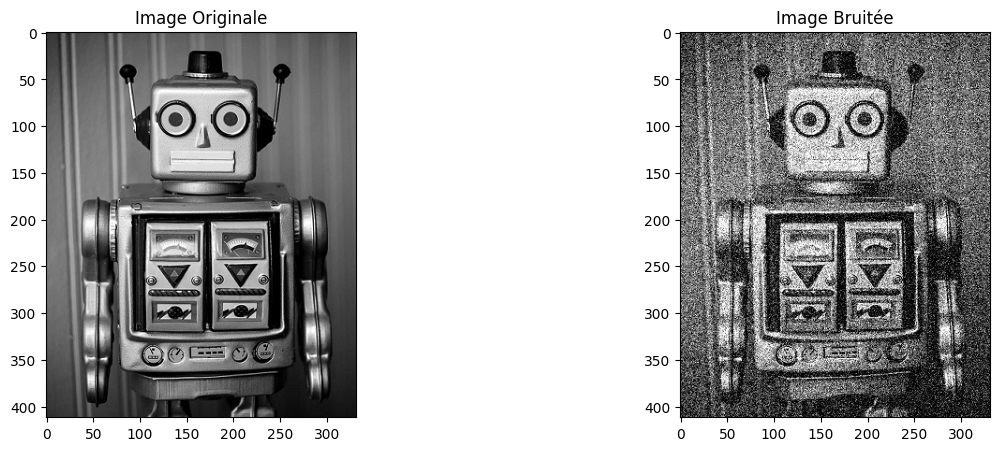

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

imgR0 = plt.imread("robot_no_noise.jpg")
imgR = imgR0[:, :, 0] / 255
imgRB0 = plt.imread("robot_noise.jpg")
imgRB = imgRB0[:, :, 0] / 255


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(imgR, cmap="gray")
axes[0].set_title("Image Originale")
axes[1].imshow(imgRB, cmap="gray")
axes[1].set_title("Image Bruitée")

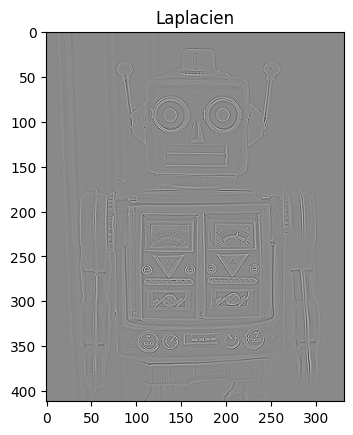

In [2]:
## Q4 grad, div et laplacien


def grad(u):
    dux = np.zeros(u.shape)
    duy = np.zeros(u.shape)

    dux[:-1, :] = u[1:, :] - u[:-1, :]
    duy[:, :-1] = u[:, 1:] - u[:, :-1]

    return np.array([dux, duy])


def div(v):
    n, m = v.shape[1], v.shape[2]
    divx = np.zeros((n, m))
    divy = np.zeros((n, m))

    divx[1:, :] = v[0, 1:, :] - v[0, :-1, :]
    divx[0, :] = v[0, 0, :]
    divx[-1, :] = -v[0, -2, :]

    divy[:, 1:] = v[1, :, 1:] - v[1, :, :-1]
    divy[:, 0] = v[1, :, 0]
    divy[:, -1] = -v[1, :, -2]

    return divx + divy


def laplacien(u):
    return div(grad(u))

plt.imshow(laplacien(imgR),cmap='gray')
plt.title("Laplacien")
plt.show();

5. Justification du choix des paramètres, commentaire

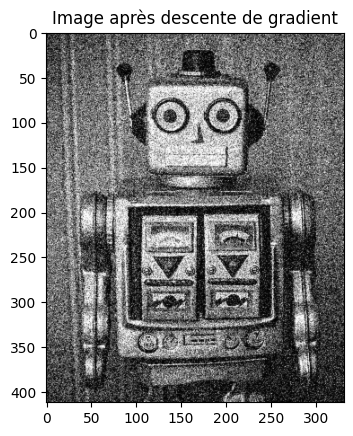

In [4]:
def funR(u, ub):
    g = grad(u)
    return (
        (np.linalg.norm(u - ub, ord=2) ** 2) / 2
        + np.linalg.norm(g[0], ord=2) ** 2
        + np.linalg.norm(g[1], ord=2) ** 2
    )


def grad_funR(u, ub):
    return u - ub - 2 * laplacien(u)


def optim_gradient_fixed_step(grad_fun, x0, L, xb, max_iter=100, epsilon_grad_fun=1e-8):
    nb_iter = 0
    x = x0
    while nb_iter <= max_iter and np.linalg.norm(grad_fun(x, xb)) > epsilon_grad_fun:
        nb_iter += 1
        x -= L * grad_fun(x, xb)
    return x


x0, pas = np.zeros(imgR.shape), 1e-3
imgRB_opti = optim_gradient_fixed_step(grad_funR, x0, pas, imgRB)

plt.imshow(imgRB_opti, cmap="gray")
plt.title("Image après descente de gradient");


In [ ]:
def RMSE(u, uVT):
    n, m = u.shape
    return np.linalg.norm(uVT - u) / (n * m) ** 0.5


print(
    f"RMSE de l'image trouvée par minimisation = {RMSE(imgRB_opti, imgR)}, et RMSE de l'image bruitée = {RMSE(imgRB, imgR)}"
)